# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa import stattools
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from scipy.stats import probplot

In [24]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575


#### Start by fitting a linear regression model with target being life expectancy and predictor variable year.

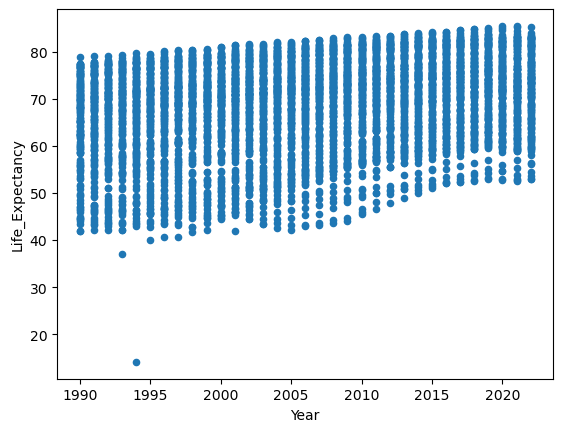

In [3]:
gdp_le.plot(kind="scatter", x= 'Year', y= 'Life_Expectancy');

#### a. What coefficients do you get? Interpret the meaning of these coefficents.

In [25]:
year_vs_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
year_vs_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

Our increase will be 0.2677(Year) starting at -468.138 on the Life Expectancy.

- the formula would fill as: $$Mean(Life\_Expectancy) = -468.138140 + 0.267722(Year)$$ meaning each increase in one unit on average the Life Expectancy increases by ~0.267722 years.  

#### b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [26]:
lm = smf.ols(formula='Life_Expectancy ~ I(Year - 1990)', data=gdp_le).fit()
lm.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In 1990, Our increase will be 0.2678/Year starting at 64.628 on the Life Expectancy. Which I beleive is statistically signifigant. 

In [30]:
print(lm.summary())
print(f'Breusch-Pagan: {sms.het_breuschpagan(lm.resid, lm.model.exog)}');
print(f'Jarque-Bera: {sms.jarque_bera(lm.resid)}');
print(f'Durbin-Watson: {sms.durbin_watson(lm.resid)}');
print(f'Omnibus: {sms.omni_normtest(lm.resid)}');

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        11:50:34   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.

**Interpretations**  

- The new model shifted to the year 1990 corresponding with the value of 0, the only difference in the two models is a transposition. The slope coefficient is the same in both models, the intercept is different based on whether the model takes the year 1990 as the value of 1990 or the value of 0.  
- The p-value for the coefficients is approximately zero, indicating that the coefficients are statistically significant.   

Durbin-Watson = 0.058  

**P-values**  
Breusch-Pagan = 1.62e-23  
Jarque-Bera = 1.34e-102   
Omnibus = 7.5e-85    

- We should use caution when interpreting whether the coefficients are statistically significant because they violate the LINE requirements. 

#### c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [31]:
means_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
means_per_year['mean_estimate'] = lm.predict(means_per_year)
means_per_year.head(5)

,Year,Life_Expectancy,mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


The model is very close

d. Plot the actual values against your model's estimates for the mean life expectancy.

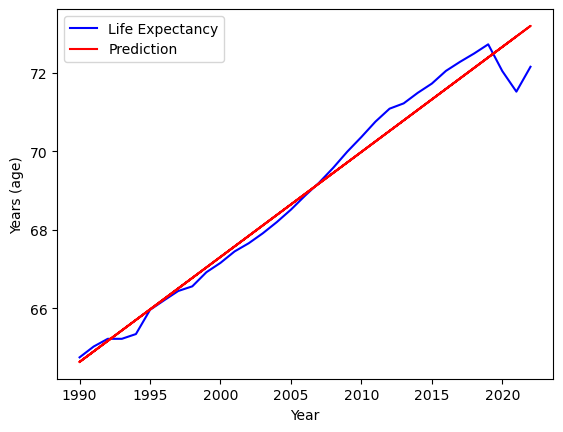

In [35]:
means_per_year.plot(kind = 'line', x= 'Year', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le['Year'], lm.fittedvalues, color = 'red')
plt.ylabel('Years (age)')
plt.legend(['Life Expectancy', 'Prediction']);

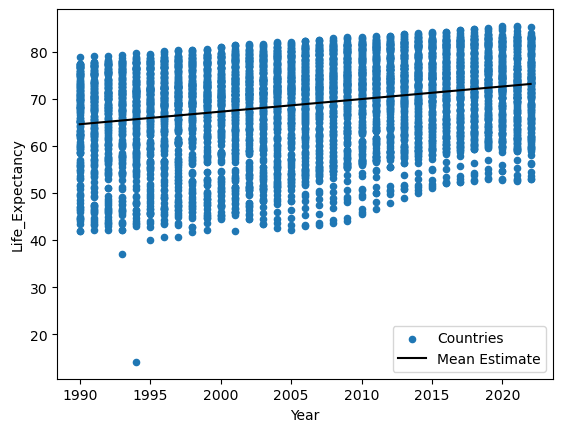

In [41]:
fig, ax = plt.subplots()
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
means_per_year.plot(x='Year', y='mean_estimate', ax=ax, color='black')
plt.legend(['Countries', 'Mean Estimate']);

e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        12:03:59   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print(f'variance of residuals is {lm.resid.var()}')
print(f'vairance of Life_Expectancy is {gdp_le['Life_Expectancy'].var()}')

variance of residuals is 82.3971125224111
vairance of Life_Expectancy is 88.74671724809251


The R-squared values make sense because they should be very similar, based on what I did. 
There is a lot of variation left to be explained because there is slightly less variation.

### Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [47]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463


In [48]:
lm_2021= smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lm_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

a. What coefficients do you get? Interpret the meaning of those coefficients.

Our increase will be 0.000257 starting at 65.949 on the Life Expectancy.

#### b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [49]:
lm_2021_adjusted = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data=gdp_le_2021).fit()
lm_2021_adjusted.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

In [19]:
lr_gdp_2021_dollars= smf.ols("I(GDP_Per_Capita / 1000) ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp_2021_dollars.params

Intercept        -1.924117e-14
GDP_Per_Capita    1.000000e-03
dtype: float64

I used a log transformation to essentially change the magnitude of our units, meaning one unit increase ($1000) in GDP per capita results in a 0.256892 increase in mean life expectancy. 

#### c. Are the coefficients statistically significant?

In [50]:
lm_2021_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        12:11:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are not statistically significant because the P-values are near 0.

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000 dollars? What about one whose gdp per capita is 100,000 dollars?

In [52]:
predictor = lm_2021_adjusted.params['I(GDP_Per_Capita / 1000)']
intercept = lm_2021_adjusted.params['Intercept']
mean_le_50k = predictor * 50 + intercept
mean_le_100k = predictor * 100 + intercept
[mean_le_50k, mean_le_100k, (mean_le_100k/mean_le_50k)]

[np.float64(78.7944572464132),
 np.float64(91.63904465544815),
 np.float64(1.1630138446016092)]

The country with GDP per capita of 100,000 dollars has more than 10 years life expectancy of a country with GDP per Capita of 50,000 dollars

#### e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


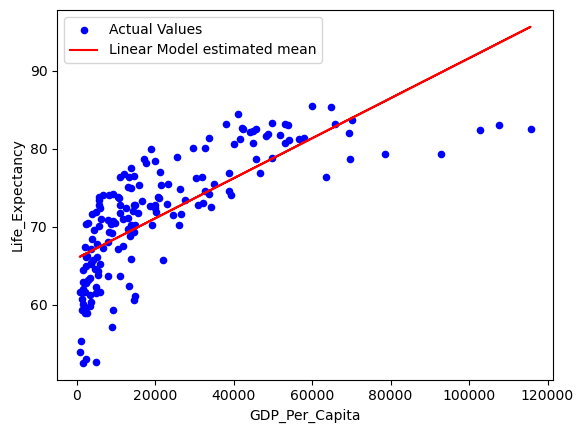

In [55]:
display(gdp_le_2021)
gdp_le_2021.plot(kind = 'scatter', x= 'GDP_Per_Capita', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le_2021['GDP_Per_Capita'], lm_2021_adjusted.fittedvalues, color = 'red')
plt.legend(['Actual Values', 'Linear Model estimated mean']);

This shows a positive association between the two variables, but it does not fit well in the current form. 

### Now, fit a model for life expectancy based on the log of gdp per capita.

In [58]:
lm_2021_log = smf.ols('Life_Expectancy ~ I(np.log(GDP_Per_Capita))', data=gdp_le_2021).fit()

a. Inspect the coefficients for this model. Are they statistically significant? 

In [59]:
lm_2021_log.params

Intercept                    18.946970
I(np.log(GDP_Per_Capita))     5.589014
dtype: float64

In [61]:
lm_2021_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        12:26:00   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    18.9470      2.547      7.438      0.000      13.919      23.975
I(np.log(GDP_Per_Capita))     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretations** 

The p-value(near zero) is statistically significant; therefore it is unlikely that the relationship between GDP per capita and life expectancy shown is due to chance. Lets look at our other linear regression statistics. 

**Notable Statistics**  
- **Durbin-Watson** = 1.974  *a value near 2 indicates very little autocorrelation in the residuals, indicating independence in errors*  
- **Jarque-Bera** = 18.922, **JB p-value** = 7.78e-05  *a high JB and a near zero p-value indicate that this data did not come from a normal distribution, meaning we'll need to further investigate.  
- **Skew** = -0.725  *this indicates a slight left skew, which is not indicative of a normal distribution*  
- **Kurtosis** = 3.725  *this indicates a leptokurtic distribution, meaning there is an increased likelihood that outliers are impacting the shape of the distribution* 

#### b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars? What about for those with a gdp per capita of 100,000 dollars? 

the predicted model is: $$Mean(Life\_Expectancy) = 18.946970 + 5.589014(log(GDP\_Per\_Capita))$$  

In [62]:
predictor = lm_2021_log.params['I(np.log(GDP_Per_Capita))']
intercept = lm_2021_log.params['Intercept']
mean_le_50k_log = predictor * np.log(50000) + intercept
mean_le_100k_log = predictor * np.log(100000) + intercept
[mean_le_50k_log, mean_le_100k_log, (mean_le_100k_log/mean_le_50k_log)]

[np.float64(79.41886072606525),
 np.float64(83.29286991695194),
 np.float64(1.048779460640327)]

In [65]:
print(f' The estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars is {mean_le_50k_log} years.')
print(f' The estimate for the average life expectancy for countries with a gdp per capita of 100,000 dollars is {mean_le_100k_log} years.')

 The estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars is 79.41886072606525 years.
 The estimate for the average life expectancy for countries with a gdp per capita of 100,000 dollars is 83.29286991695194 years.


#### c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

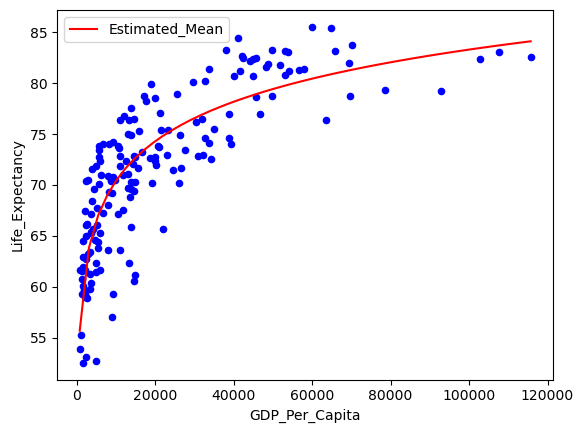

In [70]:
mean_estimates_df = pd.DataFrame(
    {'GDP_Per_Capita' : np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), 
                                    gdp_le_2021['GDP_Per_Capita'].max())}
)
mean_estimates_df['Estimated_Mean'] = lm_2021_log.predict(mean_estimates_df)

fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', 
                 x= 'GDP_Per_Capita', 
                 y = 'Life_Expectancy', 
                 color = 'blue', 
                 ax=ax)
mean_estimates_df.plot(x='GDP_Per_Capita', 
                       y='Estimated_Mean', 
                       ax=ax, 
                       color='red');

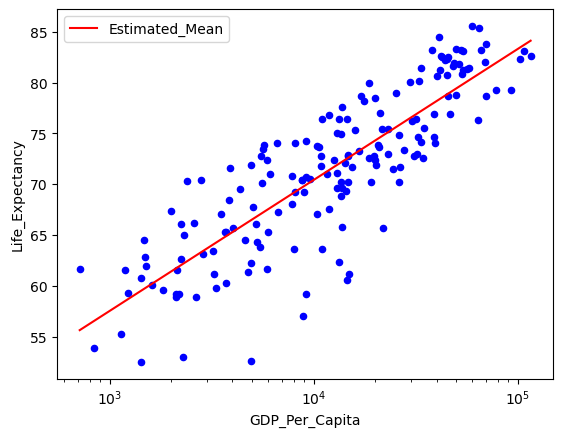

In [72]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', 
                 x= 'GDP_Per_Capita',
                 y = 'Life_Expectancy', 
                 color = 'blue', 
                 ax=ax,
                 logx=True)
mean_estimates_df.plot(x='GDP_Per_Capita',
                       y='Estimated_Mean',
                       ax=ax, color='red', 
                       logx=True);

### Finally, return to the full dataset.

a. First, fit a linear regression model for life expectancy based on the log of gdp per capita. 

In [77]:
gdp_le['log_GDP_Per_Capita'] = np.log(gdp_le['GDP_Per_Capita'])
log_gdp_lm= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita", data=gdp_le).fit()
log_gdp_lm.params

Intercept             9.194102
log_GDP_Per_Capita    6.531130
dtype: float64

b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [76]:
log_gdp_lm_year= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita + I(Year-1990)", data=gdp_le).fit()
log_gdp_lm_year.params

Intercept             8.561151
log_GDP_Per_Capita    6.359936
I(Year - 1990)        0.134487
dtype: float64

In [78]:
log_gdp_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:45:25   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1941      0.532     17.297      0.000       8.152      10.236
log_GDP_Per_Capita     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
log_gdp_lm_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:45:35   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5612      0.517     16.563      0.000       7.548       9.574
log_GDP_Per_Capita     6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)         0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
means = gdp_le.groupby('Year')[['Life_Expectancy', 'log_GDP_Per_Capita']].mean().reset_index()
means.head(5)

,Year,Life_Expectancy,log_GDP_Per_Capita
0,1990,64.745253,8.837510
1,1991,65.021276,8.834962
2,1992,65.217845,8.844434
3,1993,65.218031,8.838053
4,1994,65.339539,8.828003


In [81]:
display(sms.anova_lm(log_gdp_lm_year, typ=2))
display(sms.anova_lm(log_gdp_lm, log_gdp_lm_year))

,sum_sq,df,F,PR(>F)
log_GDP_Per_Capita,315865.086680,1.0,12630.817342,0.000000e+00
I(Year - 1990),8582.183604,1.0,343.184474,2.273290e-74
Residual,137566.223531,5501.0,NaN,NaN


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5502.0,146148.407135,0.0,NaN,NaN,NaN
1,5501.0,137566.223531,1.0,8582.183604,343.184474,2.273290e-74


Limitations: year only serves as a predictor and restricts the sample from being a random sample. It is not a random sample because our observations are not independent.

P-Value: indicates that it is statistically significant and the year is not a good predictor variable.